In [20]:
import matplotlib.pyplot as plt
import numpy as np

# File path
sub_image_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Codes\\normal codes\\sub_images\\RUH_2018-12-15_0_8.npy"

# Load the sub-image as a NumPy array
sub_image = np.load(sub_image_path)
ndvi_processed = np.nan_to_num(sub_image, nan=0.01)

In [21]:
ndvi_processed

array([[0.01      , 0.01      , 0.01      , ..., 0.07692308, 0.07571802,
        0.08729389],
       [0.07486366, 0.07025108, 0.07025108, ..., 0.07040957, 0.08224299,
        0.09646147],
       [0.06808403, 0.07775211, 0.07775211, ..., 0.06555091, 0.0723323 ,
        0.08175474],
       ...,
       [0.08645707, 0.08645707, 0.07238913, ..., 0.07375217, 0.0709072 ,
        0.06975346],
       [0.08274499, 0.08274499, 0.06150736, ..., 0.07204905, 0.07650603,
        0.07975895],
       [0.0724462 , 0.08120649, 0.08120649, ..., 0.0668428 , 0.06531531,
        0.07873175]], dtype=float32)

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats



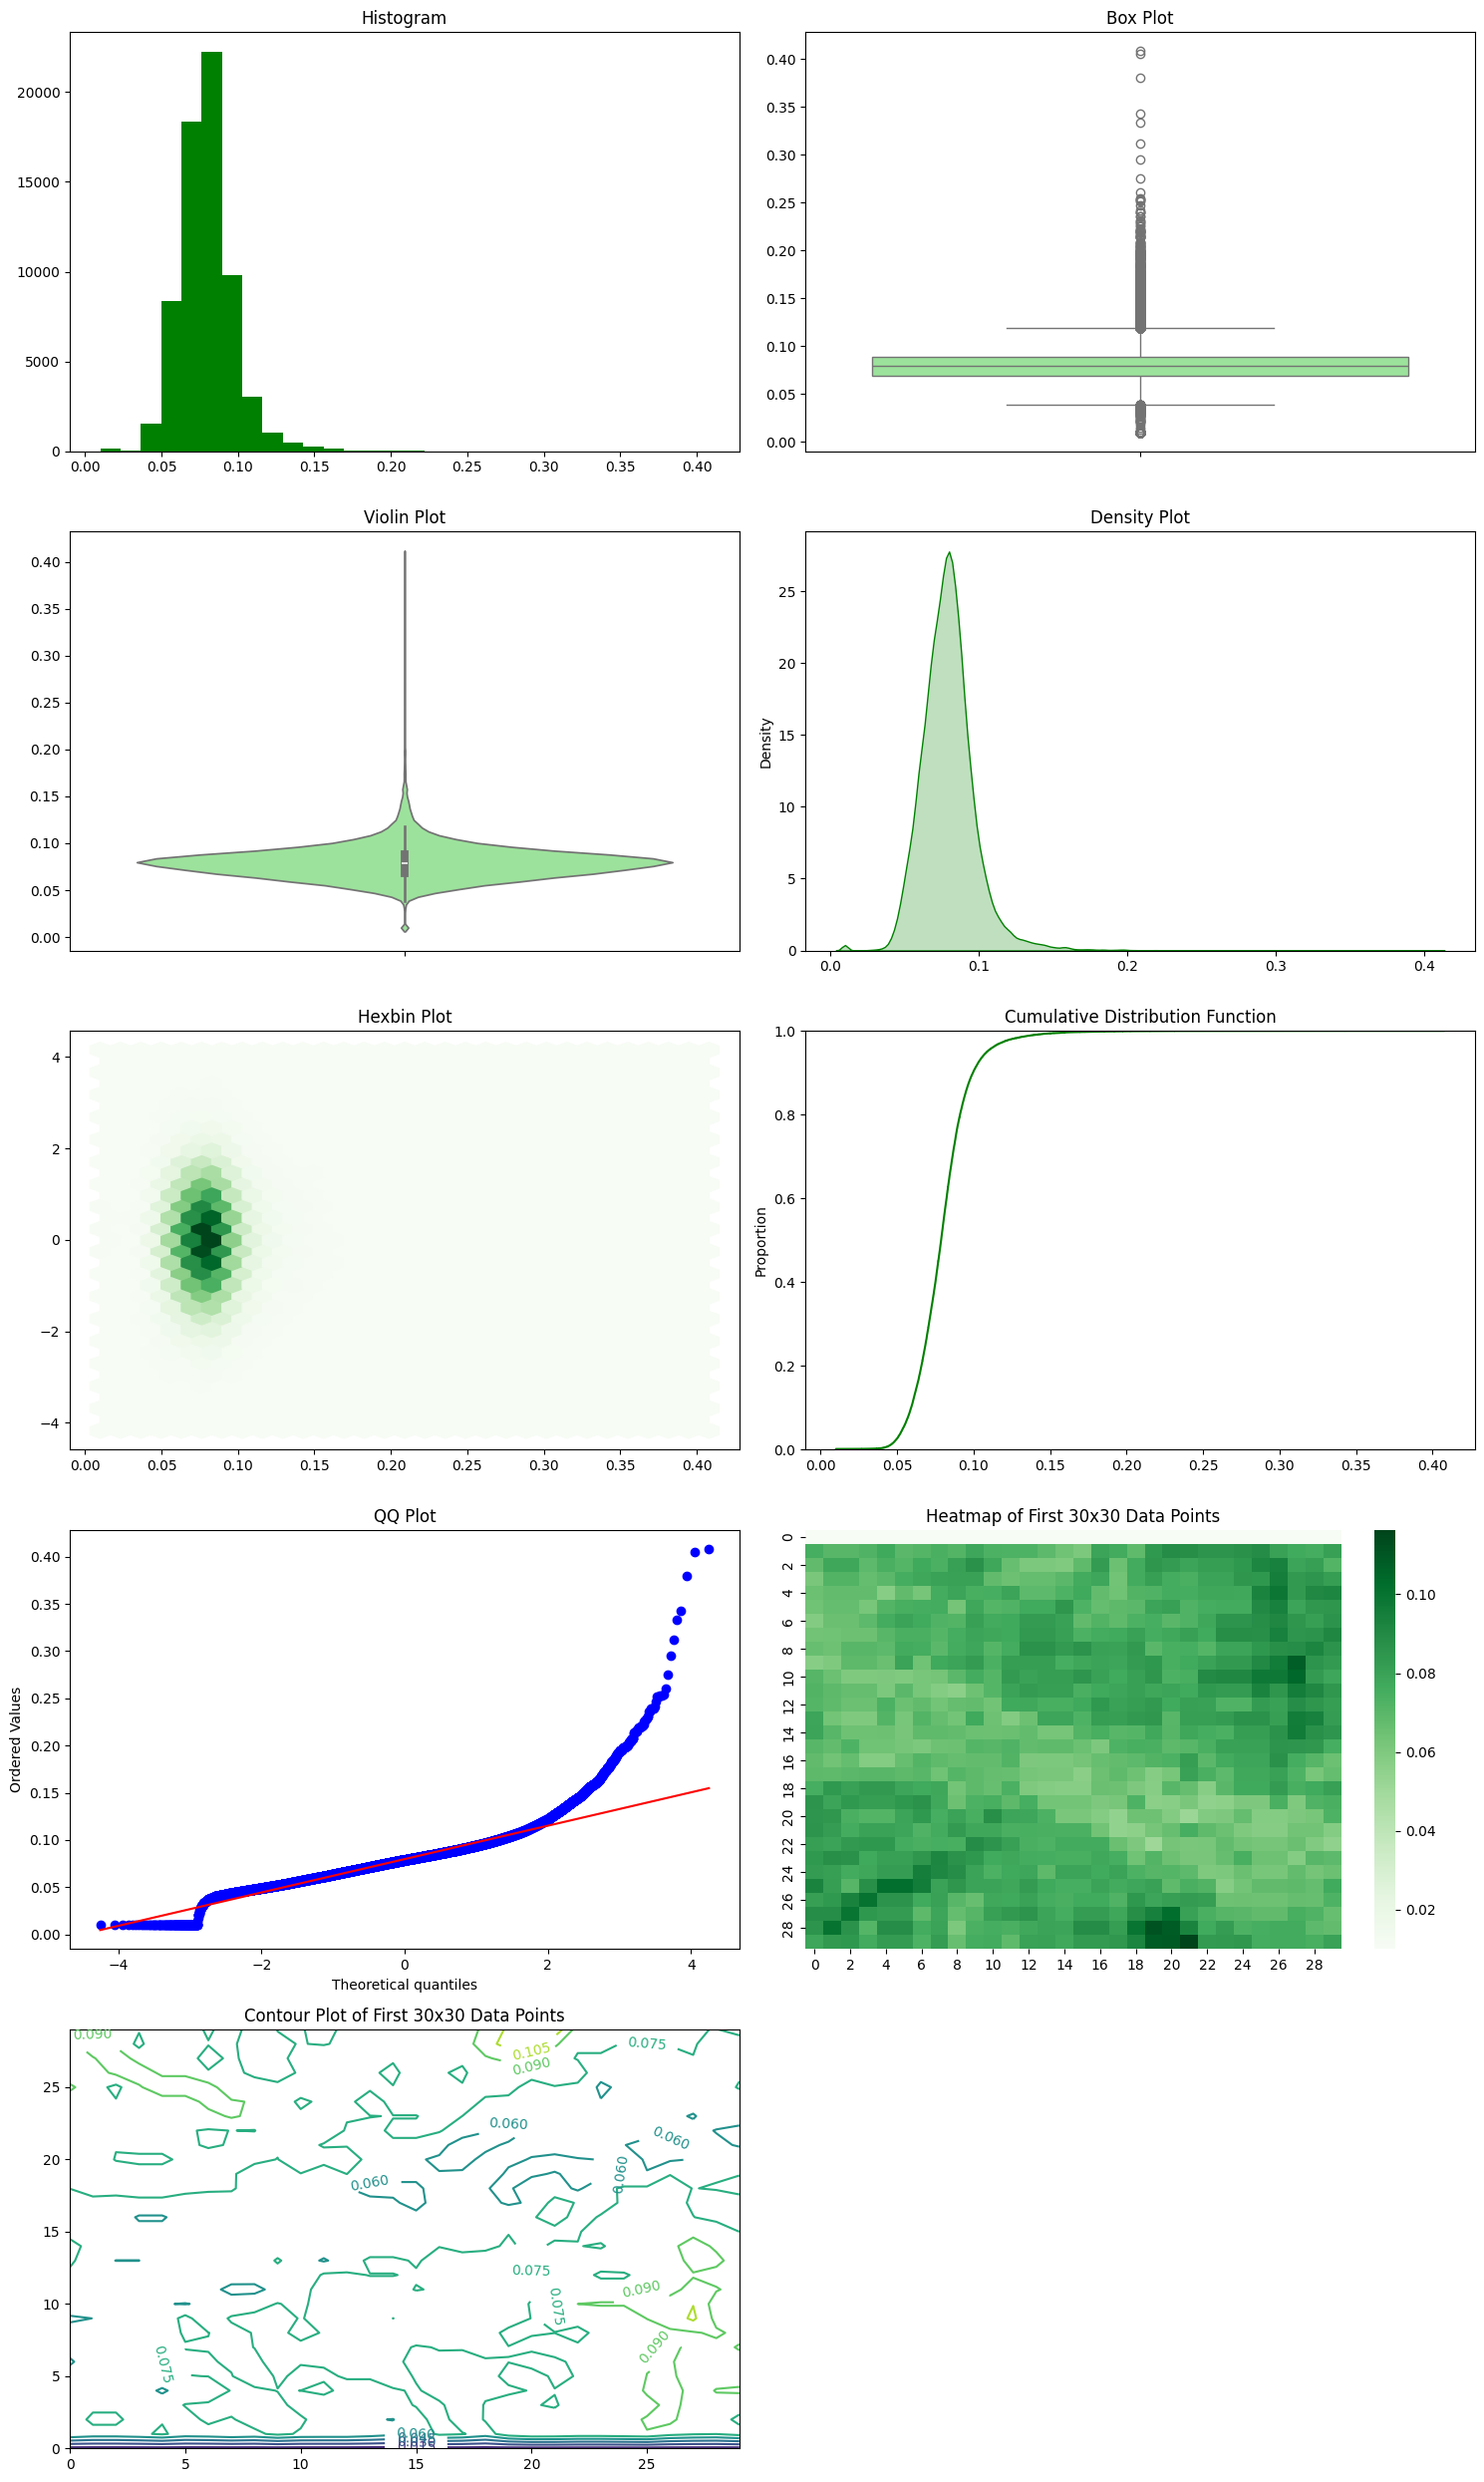

In [25]:


# Assuming ndvi_array is your NDVI data loaded into a NumPy array
ndvi_flat = ndvi_processed.flatten()

# Setting up the figure
fig, axs = plt.subplots(5, 2, figsize=(15, 25))

# Histogram
axs[0, 0].hist(ndvi_flat, bins=30, color='green')
axs[0, 0].set_title('Histogram')

# Box Plot
sns.boxplot(ndvi_flat, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Box Plot')

# Violin Plot
sns.violinplot(ndvi_flat, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Violin Plot')

# Density Plot
sns.kdeplot(ndvi_flat, ax=axs[1, 1], color='green', fill=True)
axs[1, 1].set_title('Density Plot')

# Hexbin Plot
axs[2, 0].hexbin(x=ndvi_flat, y=np.random.randn(len(ndvi_flat)), gridsize=30, cmap='Greens')
axs[2, 0].set_title('Hexbin Plot')

# Cumulative Distribution Function
sns.ecdfplot(ndvi_flat, ax=axs[2, 1], color='green')
axs[2, 1].set_title('Cumulative Distribution Function')

# QQ Plot
stats.probplot(ndvi_flat, dist="norm", plot=axs[3, 0])
axs[3, 0].set_title('QQ Plot')

# Heatmap (reshaped for visualization)
sns.heatmap(ndvi_processed[:30, :30], ax=axs[3, 1], cmap='Greens')
axs[3, 1].set_title('Heatmap of First 30x30 Data Points')

# Contour Plot
CS = axs[4, 0].contour(X[:30, :30], Y[:30, :30], ndvi_processed[:30, :30])
axs[4, 0].clabel(CS, inline=True, fontsize=10)
axs[4, 0].set_title('Contour Plot of First 30x30 Data Points')

# Closing the last plot space (unused)
axs[4, 1].axis('off')

plt.tight_layout()
plt.show()


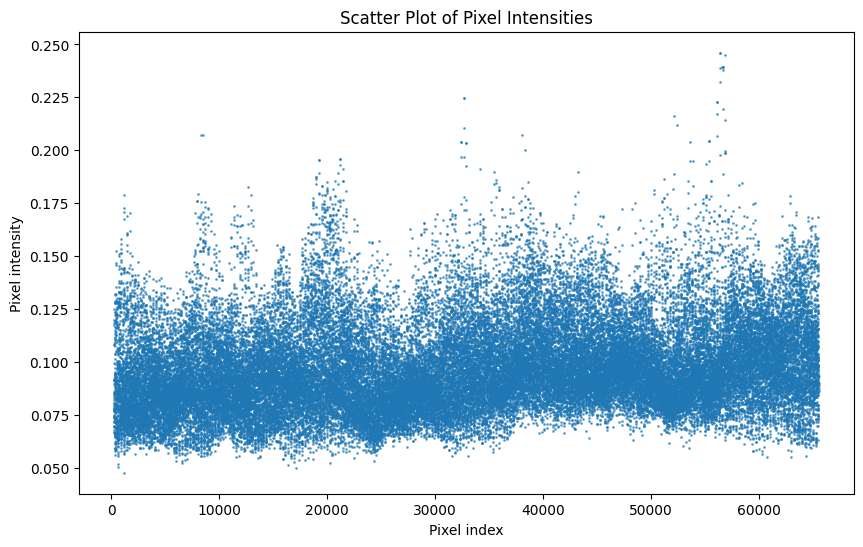

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .npy file
file_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Codes\\normal codes\\sub_images\\RUH_2018-12-15_0_20.npy"

# Load the image array
image_array = np.load(file_path)

# Flatten the 2D image array to 1D
flat_image_array = image_array.flatten()

# Create an array of indices for the x-axis
indices = np.arange(len(flat_image_array))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(indices, flat_image_array, alpha=0.6, s=1)
plt.title('Scatter Plot of Pixel Intensities')
plt.xlabel('Pixel index')
plt.ylabel('Pixel intensity')
plt.show()



In [68]:

from osgeo import gdal
# File path
image_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-Data\\NDVI_RUH-B4-B8_2018-12-15.tif"


In [69]:
image_path = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\NDVI-Data\\NDVI_RUH-B4-B8_2018-12-15.tif"

data=gdal.Open(image_path)
NDVI = data.GetRasterBand(1)
NDVI_image = NDVI.ReadAsArray()
ndvi_processed = np.nan_to_num(NDVI_image, nan=0.01)
ndvi_processed

array([[0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       [0.01      , 0.01      , 0.01      , ..., 0.01      , 0.01      ,
        0.01      ],
       ...,
       [0.4053687 , 0.4053687 , 0.38779733, ..., 0.05140681, 0.05140681,
        0.05751469],
       [0.42625263, 0.39711255, 0.39711255, ..., 0.05258729, 0.05258729,
        0.05639958],
       [0.01      , 0.41781062, 0.41781062, ..., 0.05      , 0.05      ,
        0.05529954]], dtype=float32)

In [70]:
print("Current shape of ndvi_processed:", ndvi_processed.shape)


Current shape of ndvi_processed: (6345, 6445)


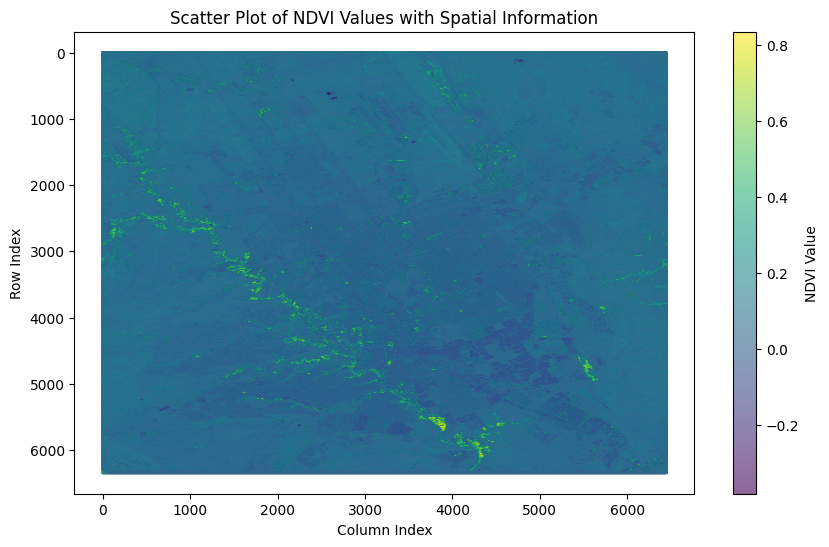

In [71]:
# Assuming ndvi_processed is already defined and is a 2D numpy array from your previous code

# Create a meshgrid of x, y indices
rows, cols = ndvi_processed.shape
x_indices, y_indices = np.meshgrid(np.arange(cols), np.arange(rows))

# Flatten the meshgrid arrays and the NDVI array
flat_x_indices = x_indices.flatten()
flat_y_indices = y_indices.flatten()
flat_ndvi_array = ndvi_processed.flatten()

# Create the scatter plot, where the color intensity is based on NDVI values
plt.figure(figsize=(10, 6))
sc = plt.scatter(flat_x_indices, flat_y_indices, c=flat_ndvi_array, alpha=0.6, s=1, cmap='viridis')
plt.title('Scatter Plot of NDVI Values with Spatial Information')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.colorbar(sc, label='NDVI Value')
plt.gca().invert_yaxis()  # Inverting the y-axis to match image coordinates
plt.show()


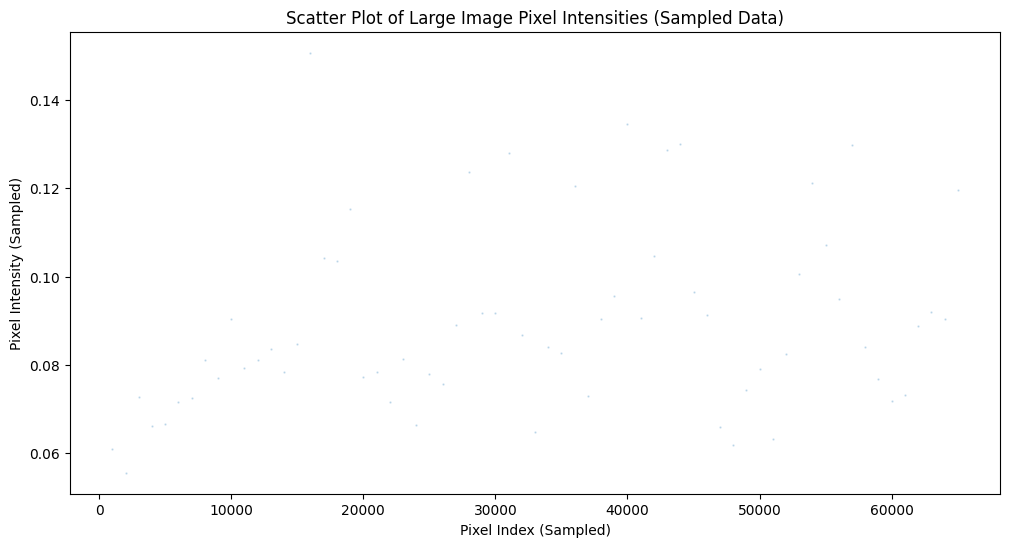

In [64]:
# We'll create a larger array to simulate a 6144x6144 image data array
# In an actual scenario, you would load this from a file as before

# Simulate the image data with a random 6144x6144 array
# For demonstration purposes, we're using random data, but you would load your actual data here

# Flatten the 2D image array to a 1D array for plotting
flat_image_array_large = ndvi_processed.flatten()

# Create an array with the indices of each pixel
indices_large = np.arange(len(flat_image_array_large))

# Due to the very large number of points, plotting might take a lot of resources
# Therefore, we plot only a sample of the data to give an impression of the distribution


# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(sampled_indices, sampled_intensities, alpha=0.2, s=0.5)  # Set alpha for better visibility if points overlap
plt.title('Scatter Plot of Large Image Pixel Intensities (Sampled Data)')
plt.xlabel('Pixel Index (Sampled)')
plt.ylabel('Pixel Intensity (Sampled)')
plt.show()



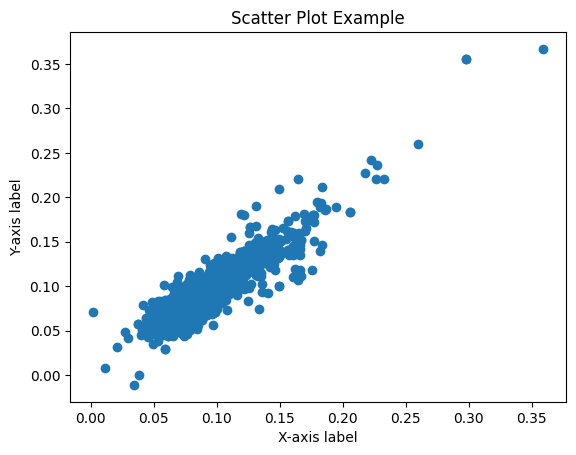

In [16]:


# Assuming sub_image contains two rows: one for X values and one for Y values
# For a scatter plot, we need two arrays: one for the x-axis and one for the y-axis
x_values = NDVI_image[0]  # This might need adjustment depending on your data structure
y_values = NDVI_image[1]  # This might need adjustment depending on your data structure

# Create the scatter plot
plt.scatter(x_values, y_values)

# Add titles and labels (optional)
plt.title('Scatter Plot Example')
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Show the plot
plt.show()